# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья



### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/43413/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__ 10

ссылки на контест:

https://contest.yandex.ru/contest/43413/problems/A/

https://contest.yandex.ru/contest/43413/problems/B/

мой юзернейм: ekneudachina@edu.hse.ru

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [ ]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [ ]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

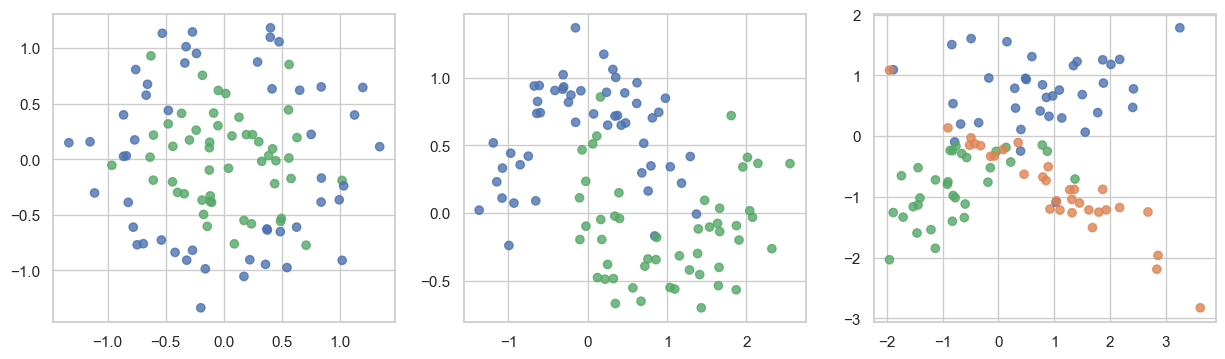

In [ ]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [ ]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.7, w_pad=0.7, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

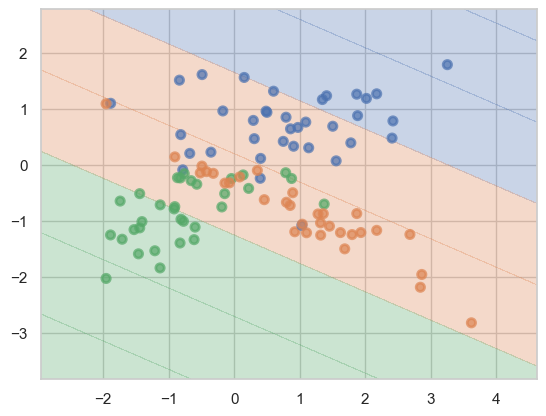

In [ ]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [ ]:
size = len(datasets)
x_train, x_test, y_train, y_test = ([None] * size for _ in range(4))
for i in range(size):
   x, y = datasets[i]
   x_train[i], x_test[i], y_train[i], y_test[i] = train_test_split(x, y, test_size=0.3, random_state=42)

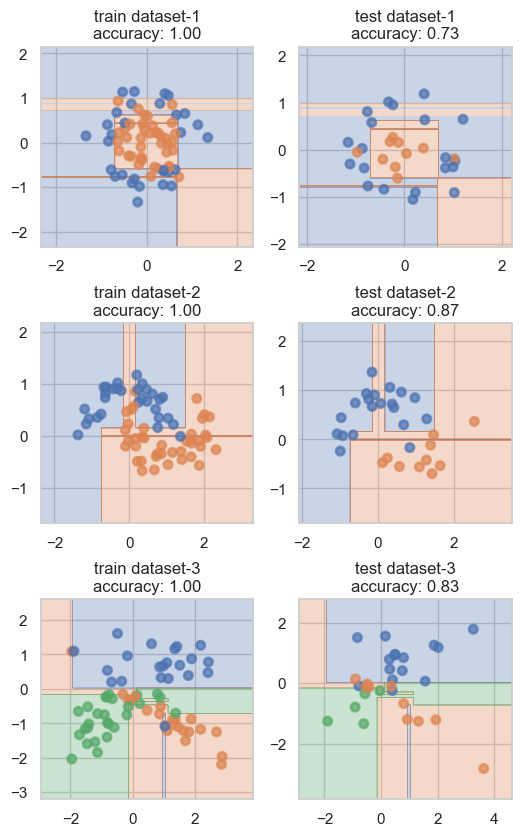

In [ ]:
def accuracy(predicted, real):
    return (predicted == real).mean()

plt.figure(figsize = (6, 9))

for i in range(size):
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(x_train[i], y_train[i])
    plt.subplot(3, 2, 2 * i + 1)
    plot_surface(clf, x_train[i], y_train[i])
    plt.title('train dataset-{0:d}\naccuracy: {1:.2f}'.format(i+1, accuracy(clf.predict(x_train[i]), y_train[i])))
    plt.subplot(3, 2, 2 * i + 2)
    plot_surface(clf, x_test[i], y_test[i])
    plt.title('test dataset-{0:d}\naccuracy: {1:.2f}'.format(i+1, accuracy(clf.predict(x_test[i]), y_test[i])))


__Ответ:__ судя по картинкам, деревья довольно сильно переобучились, потому что видны какие-то странные очень узкие полоски на разделяющей плоскости. это выглядит, будто одна-две точки в листе

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

dataset-1: best test accuracy 0.87 with 4 max_depth and 4 min_samples_leaf
dataset-2: best test accuracy 0.93 with 2 max_depth and 1 min_samples_leaf
dataset-3: best test accuracy 0.83 with 4 max_depth and 1 min_samples_leaf


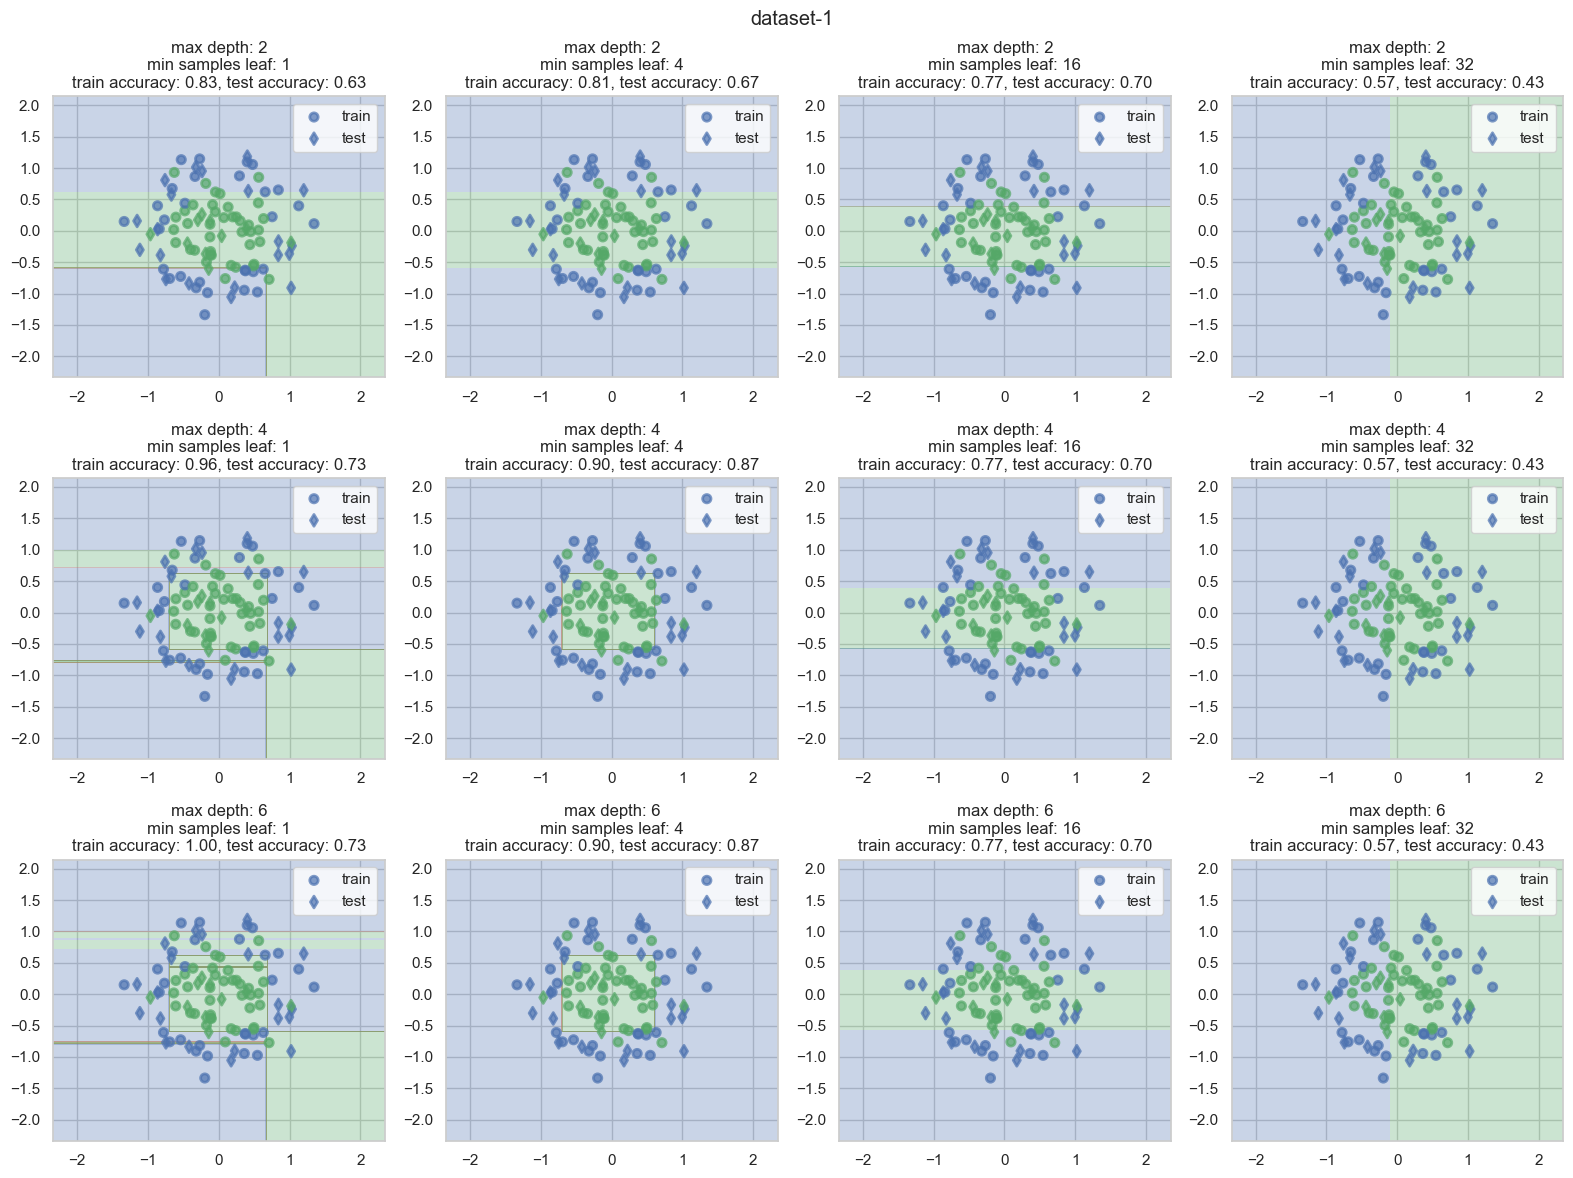

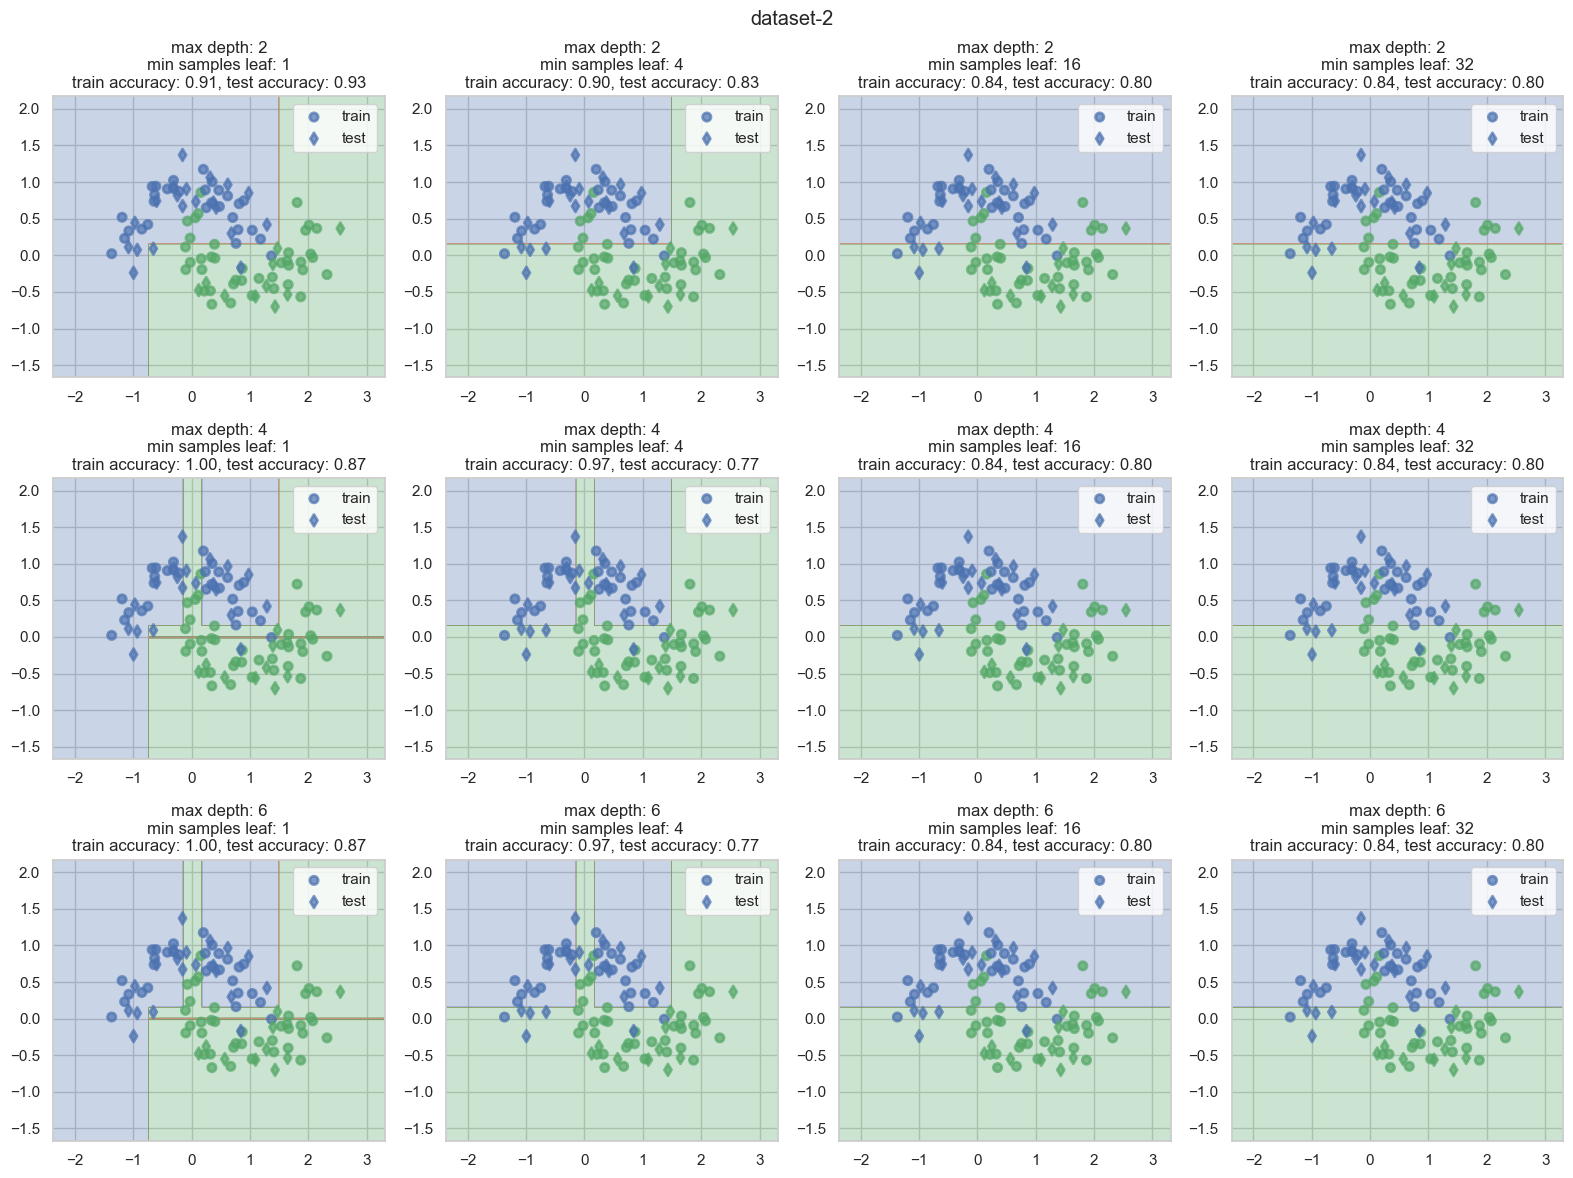

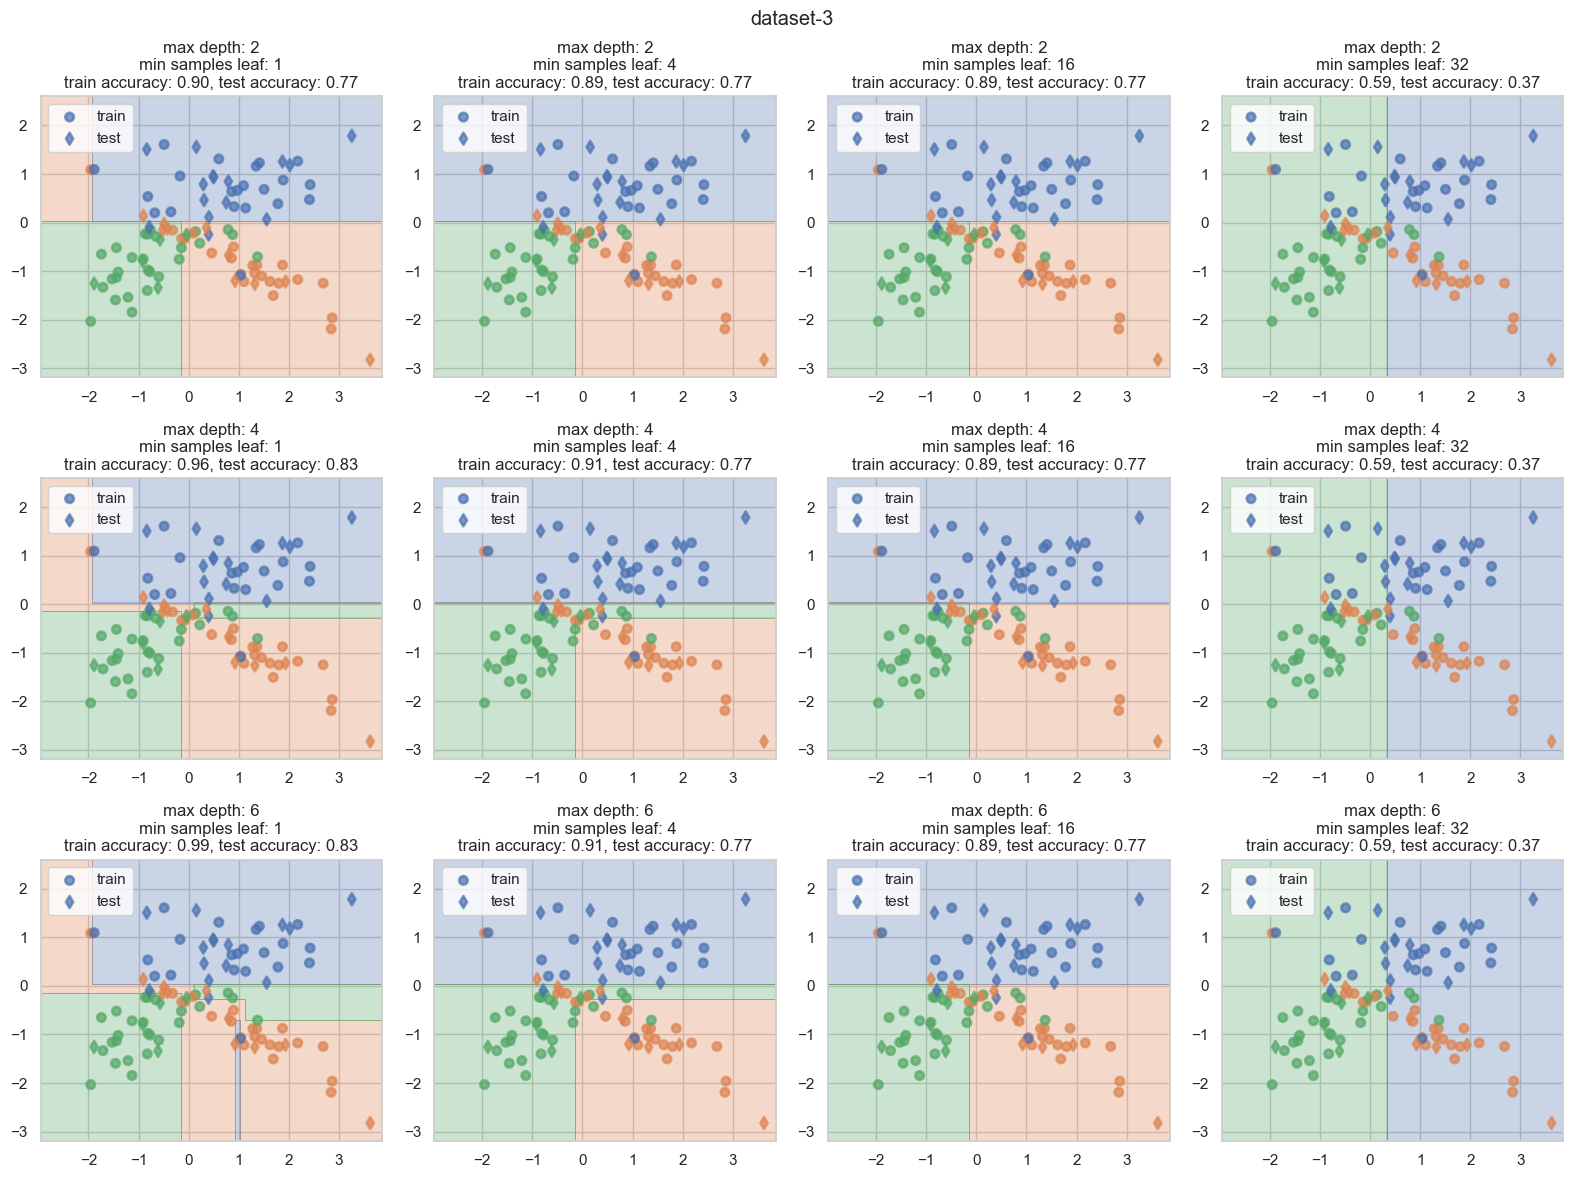

In [ ]:
def double_plot_surface(clf, x_train, y_train, x_test, y_test):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
    y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout()

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cmap, alpha=.7, linewidths=2, label='train')
    plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=cmap, alpha=.7, linewidths=2, marker='d', label='test')
    plt.legend()

max_depth = [2, 4, 6]
depth_size = len(max_depth)
min_samples_leaf = [1, 4, 16, 32]
samples_size = len(min_samples_leaf)

for i in range(size):
    # отдельный plot для каждого датасета
    fig = plt.figure(figsize = (16, 12))
    fig.suptitle(f'dataset-{i+1}')

    best_accuracy = 0
    best_depth = 0
    best_samples = 0

    plot = 1
    for depth in max_depth:
        for samples in min_samples_leaf:
            clf = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=samples, random_state=42)
            clf.fit(x_train[i], y_train[i])

            plt.subplot(depth_size, samples_size, plot)
            plot += 1
            double_plot_surface(clf, x_train[i], y_train[i], x_test[i], y_test[i])

            test_accuracy = accuracy(clf.predict(x_test[i]), y_test[i])
            if test_accuracy > best_accuracy:
                best_depth = depth
                best_samples = samples
                best_accuracy = test_accuracy
            plt.title('max depth: {0:d}\nmin samples leaf: {1:d}\ntrain accuracy: {2:.2f}, test accuracy: {3:.2f}'.format(
                depth, samples, accuracy(clf.predict(x_train[i]), y_train[i]), test_accuracy
            ))
    print("dataset-{0:d}: best test accuracy {1:.2f} with {2:d} max_depth and {3:d} min_samples_leaf".format(
        i + 1, best_accuracy, best_depth, best_samples))

__Ответ:__ судя по графикам, как будто бы лучше ограничивать не количество объектов в листах, а именно глубину дерева

разные значения глубины оптимальные для разных датасетов, для второго вообще лучше ограничить глубину до двух. а для первого, например, лучше сделать побольше глубину, но чуть ограничить количество объектов в листах. короче, для каждого датасета все индивидуально

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [ ]:
data = pd.read_csv('students.csv')
columns = ["STG", "SCG", "STR", "LPR", "PEG"]
category = ['UNS']

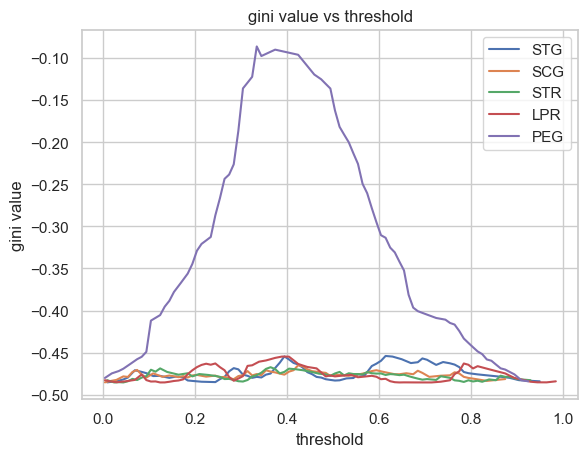

In [ ]:
from hw5code import find_best_split

for column in columns:
    thresholds, gini, _, _ = find_best_split(data[column], data[category])
    plt.plot(thresholds, gini, label=column)
plt.xlabel('threshold')
plt.ylabel('gini value')
plt.title('gini value vs threshold')
plt.legend()

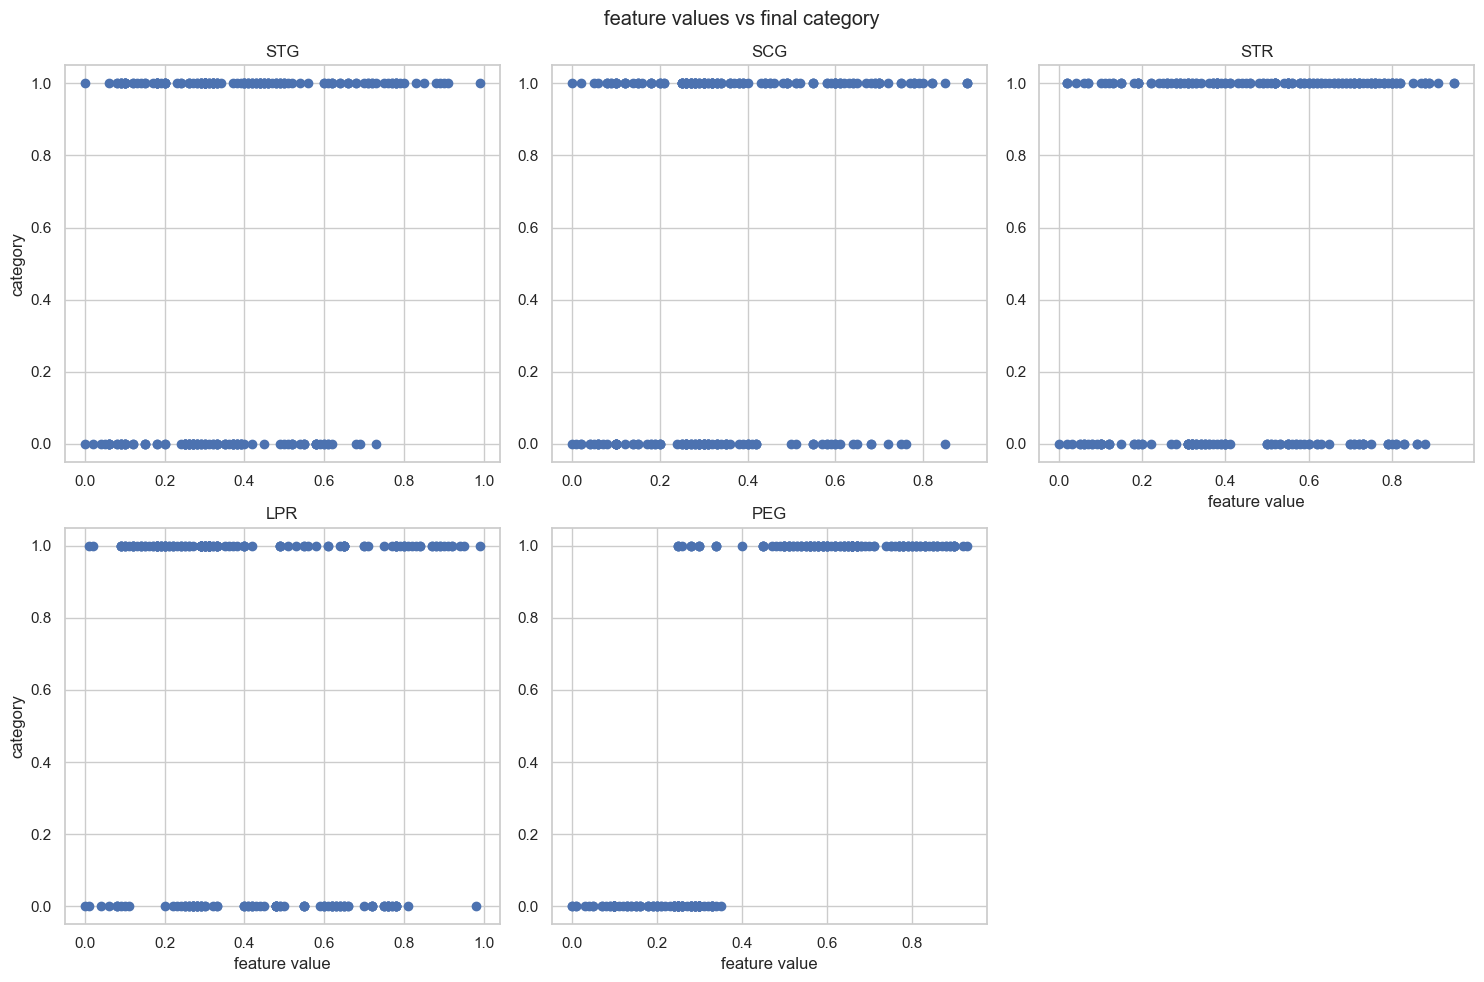

In [ ]:
fig = plt.figure(figsize = (15, 10))

i = 1
for column in columns:
    plt.subplot(2, 3, i)
    plt.scatter(data[column], data[category])
    plt.title(column)
    if i > 2:
        plt.xlabel('feature value')
    if i == 1 or i == 4:
        plt.ylabel('category')
    i += 1

plt.suptitle("feature values vs final category")
plt.tight_layout()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** на первом графике сильно выделяется признак PEG, потому что для него есть значение порога, в котором достигается пик, сильно отличающийся от среднего значения. это в принципе согласуется с тем, что мы видим на scatter-графике для PEG, потому что в нем довольно мало значений параметра, для которого категория бывает разная. ну типо если PEG большой и ближе к 1, то и категория этого объекта -- 1, если маленький PEG, то категория 0. такого, конечно, не скажешь об остальных признаках, в которых категории вперемешку.

кривая для "идеальных" в плане разделения признаков имеет явно заметную точку оптимума, близкую к нулю. признаки, по которым вборку разделить практически невозможно, конечно, выглядят по-другому: значение джини для них примерно одинаковое для всех порогов

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [ ]:
data = pd.read_csv('agaricus-lepiota.data')

In [ ]:
data.loc[data['p'] == 'e', 'p'] = 1
data.loc[data['p'] == 'p', 'p'] = 0

In [ ]:
data.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,1,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,1,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,0,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,1,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,1,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [ ]:
from hw5code import DecisionTree
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

target = ['p']
categories = data.columns[1:]

train, test = train_test_split(data, test_size=0.5, random_state=42)

encoder = LabelEncoder()
transformed_train = train[categories].copy()
transformed_test = test[categories].copy()

for column in categories:
    transformed_train[column] = encoder.fit_transform(train[column])
    transformed_test[column] = encoder.transform(test[column])

tree = DecisionTree(['categorical'] * len(categories))

tree.fit(transformed_train.values, np.array(train[target]).flatten())
predicted = tree.predict(transformed_test.values)
print('accuracy on mushroom dataset:', accuracy(predicted, np.array(test[target]).flatten()))


accuracy on mushroom dataset: 1.0


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [ ]:
x, y = list(), list()
files = ['agaricus-lepiota.data',  'tic-tac-toe.data', 'car.data', 'nursery.data']
target = ['p', 'positive', 'unacc', 'recommend']

for i in range(len(files)):
    data = pd.read_csv(files[i])
    y.append(data[target[i]])

    if i == 0:
        y[i][(y[i] == 'e')] = 1
        y[i][(y[i] == 'p')] = 0
    elif i == 1:
        y[i][(y[i] == 'positive')] = 1
        y[i][(y[i] == 'negative')] = 0
    elif i == 2:
        y[i][(y[i] == 'good')] = 1
        y[i][(y[i] == 'vgood')] = 1
        y[i][(y[i] == 'unacc')] = 0
        y[i][(y[i] == 'acc')] = 0
    elif i == 3:
        y[i][(y[i] == 'very_recom')] = 1
        y[i][(y[i] == 'priority')] = 1
        y[i][(y[i] == 'spec_prior')] = 1
        y[i][(y[i] == 'not_recom')] = 0
        y[i][(y[i] == 'recommend')] = 0

    categories = data.columns.tolist()
    categories.remove(target[i])
    x.append(data[categories].apply(LabelEncoder().fit_transform))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder

# у меня почему-то не работал библиотечный cross_val_score, поэтому я написала свой

def my_cross_val_score(tree, x, y):
    n = 10
    folds = KFold(n_splits=n, shuffle=True, random_state=69)
    predicted = list()
    for train, test in folds.split(x):
        tree.fit(x[train], y[train])
        current_predicted = tree.predict(x[test])
        predicted.append(accuracy(current_predicted, y[test]))
    return np.array(predicted).mean()

def trees(x, y):
    results = list()
    size = x.shape[1]
    scorer = make_scorer(accuracy_score)

    # все вещественные
    real_tree = DecisionTree(['real'] * size)
    results.append(cross_val_score(real_tree, x.values, y.values.astype(int), scoring=scorer, cv=10).mean())

    # все категориальные
    cat_tree = DecisionTree(['categorical'] * size)
    # results.append(my_cross_val_score(cat_tree, x.values, y.values.astype(int)))
    results.append(cross_val_score(cat_tree, x.values, y.values.astype(int), scoring=scorer, cv=10).mean())

    # все вещественные + one-hot-encoding
    transformed = OneHotEncoder(sparse=False).fit_transform(x)
    ohe_tree = DecisionTree(['real'] * transformed.shape[1])
    # results.append(my_cross_val_score(ohe_tree, transformed, y.values))
    results.append(cross_val_score(ohe_tree, x.values, y.values.astype(int), scoring=scorer, cv=10).mean())

    # DecisionTreeClassifier
    sklearn_tree = DecisionTreeClassifier(random_state=42)
    # results.append(my_cross_val_score(sklearn_tree, x, y))
    results.append(cross_val_score(sklearn_tree, x, y.astype(int), scoring=scorer, cv=10).mean())

    return results

names = ['agaricus lepiota',  'tic-tac-toe', 'car', 'nursery']
df_metrics = pd.DataFrame(columns=['all real', 'all categorical', 'all real + OHE', 'sklearn tree'])

for i in range(len(names)):
    df_metrics.loc[names[i]] = trees(x[i], y[i])

df_metrics

,all real,all categorical,all real + OHE,sklearn tree
agaricus lepiota,0.999261,1.000000,0.999261,0.961984
tic-tac-toe,0.462697,0.549265,0.462697,0.777763
car,0.942600,0.967519,0.942600,0.944371
nursery,0.999846,0.999923,0.999846,0.999846


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента.
Одинаково ли для разных наборов данных ранжируются алгоритмы?
Порассуждайте, почему так происходит.

Обратите внимание на значение признаков в разных наборах данных.
Присутствует ли в результатах какая-то компонента случайности?
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:** рассматривать все признаки как вещественные во всех случаях дает хуже результат, чем категориальные. ведь первое, в некотором смысле, -- подмножество второго. ну и плюс добавлять какой-то порядок в значения категорий не совсем правильно, кажется.

при этом one-hot кодирование вообще не меняет результат, ведь мы в итоге переберем абсолютно все те же разбиения в дереве, просто не в плане порогов в одной категории, а в плане разных признаков в преобразованных датафреймах

мне кажется, компонента случайности присутствует, ведь у нас в разных тестовых наборах данных может не присутствовать какие-то значения признаков. кажется, лучше пошаффлить сначала данные, чтобы все значения попали во все выборки

Вставьте что угодно, описывающее ваши впечатления от этого задания: